<a href="https://colab.research.google.com/github/davidesqalv/EMNIST-CNN-Kernel-training-test/blob/main/EMNIST_CNN_Kernel_training_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)
import scipy as sc

import matplotlib.pyplot as plt
import pandas as pd
import random
import copy
import math

from sklearn.metrics import confusion_matrix
from mpl_toolkits.mplot3d import Axes3D

from mlxtend.plotting import plot_confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#abriendo los datos de un csv a formato pandas dataframe
datos1 = pd.read_csv(
    '/content/drive/My Drive/IA_TEC/tarea2/airfoil_self_noise.csv',
    names=["variable1", "variable2", "variable3", "variable4", "variable5","target"], delim_whitespace=True)

datos1.head()

#abriendo los datos de un csv a formato pandas dataframe
datos2 = pd.read_csv(
    '/content/drive/My Drive/IA_TEC/tarea2/o-ring-erosion-only.csv',
    names=["variable1", "target", "variable2", "variable3", "variable4"], delim_whitespace=True)

datos2.head()

,variable1,target,variable2,variable3,variable4
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5


In [ ]:
#v=np.genfromtxt('/content/drive/My Drive/IA_TEC/tarea2/o-ring-erosion-only.csv')

0.0
[[  6.   0.  66.  50.   1.]
 [  6.   1.  70.  50.   2.]
 [  6.   0.  69.  50.   3.]
 [  6.   0.  68.  50.   4.]
 [  6.   0.  67.  50.   5.]
 [  6.   0.  72.  50.   6.]
 [  6.   0.  73. 100.   7.]
 [  6.   0.  70. 100.   8.]
 [  6.   1.  57. 200.   9.]
 [  6.   1.  63. 200.  10.]
 [  6.   1.  70. 200.  11.]
 [  6.   0.  78. 200.  12.]
 [  6.   0.  67. 200.  13.]
 [  6.   2.  53. 200.  14.]
 [  6.   0.  67. 200.  15.]
 [  6.   0.  75. 200.  16.]
 [  6.   0.  70. 200.  17.]
 [  6.   0.  81. 200.  18.]
 [  6.   0.  76. 200.  19.]
 [  6.   0.  79. 200.  20.]
 [  6.   0.  75. 200.  21.]
 [  6.   0.  76. 200.  22.]
 [  6.   1.  58. 200.  23.]]


##separar entradas y salidas


In [ ]:
#Separar los datos para el caso del ejercicio del sonido
d_1en=datos1.drop(['target'], axis=1)
d_1sa=datos1.drop(['variable1',	'variable2',	'variable3',	'variable4','variable5'], axis=1)
#Separar los datos para del orin
d_2en=datos2.drop(['target',	'variable4'], axis=1)
d_2sa=datos2.drop(['variable1',	'variable2',	'variable3',	'variable4'], axis=1)
print(d_1en)

      variable1  variable2  variable3  variable4  variable5
0           800        0.0     0.3048       71.3   0.002663
1          1000        0.0     0.3048       71.3   0.002663
2          1250        0.0     0.3048       71.3   0.002663
3          1600        0.0     0.3048       71.3   0.002663
4          2000        0.0     0.3048       71.3   0.002663
...         ...        ...        ...        ...        ...
1498       2500       15.6     0.1016       39.6   0.052849
1499       3150       15.6     0.1016       39.6   0.052849
1500       4000       15.6     0.1016       39.6   0.052849
1501       5000       15.6     0.1016       39.6   0.052849
1502       6300       15.6     0.1016       39.6   0.052849

[1503 rows x 5 columns]


In [ ]:
#Para normalizar los datos

#Para el caso del ejercicio del sonido
d_1e=d_1en/d_1en.max(axis=0)
max1=d_1sa.max(axis=0)
max11=np.array(max1)
d_1s=d_1sa/d_1sa.max(axis=0)

#Para el caso del o ring
d_2e=d_2en/d_2en.max(axis=0)
max2=d_2sa.max(axis=0)
max22=np.array(max2)
#print('hola',max22)
d_2s=d_2sa/d_2sa.max(axis=0)
print(max11[0], max22[0])

#Convertir los datos a array
#Para el caso del ejercicio del sonido
#d_1e=np.array(d_1e)
#d_1s=np.array(d_1s)
#Para el caso del orin
#d_2e=np.array(d_2e)
#d_2s=np.array(d_2s)


140.987 2


# Funciones

## Ingresar Datos

In [ ]:
#Ingresar datos
#Cantidad de neuronas por Capa
def ingresar_datos():
  entrada=input("Digite el numero de entradas:  ")
  salida=input("Digite el numero de salia:  ")
  oculta=input("Digite el numero de neuronas en la capa oculta:  ")
  #Tasa de aprendizaje y modalidad
  t_aprendizaje=input("Digite el numero de tasa de aprendizaje:  ")
  m_aprendizaje=input("Digite 1 para tasa fija, 2 para tasa variable:  ")
  #Funcion a usar
  fun=input("Digite 1 para sigmoide, 2 para tangente hiperbolica, 3 RelU:  ")
  print (entrada, salida, oculta,t_aprendizaje, m_aprendizaje, fun)
  return entrada, salida, oculta,t_aprendizaje, m_aprendizaje, fun


##Definicion inicial de los pesos

In [ ]:
def pesos_iniciales(entrada, salida, oculta):
  #en esta funcion se asignaran los pesos iniciales a las conecciones
  #de las neuronas los cuales se asignanaleatoriamente
  #Peo se refiere al array de datos entre la capa de entrada y capa oculta
  #Pos se refiere al array de datos entre la capa oculta y la capa de salida
  Peo=np.random.rand(entrada, oculta)
  Pos=np.random.rand(oculta, salida)
  # en donde la fila corresponde a la posicion de la nuerona de salida, 
  # y la columna la neurona a la que llega
  return Peo, Pos

## Funcion

In [ ]:
#Se elije la funcion a utilizar
def func(fun,x):
  # Se crea una matriz del mismo tamaño que x
  #de 0, a la cual se le actualizaran los valores
  f=len (x)#cantidad de filas
  c=len(x[0])#cantidad de columnas
  x2=np.zeros((f,c))
  if fun ==1: #funcion sigmoide
    for i in range(f):
      for j in range(c):
        x1=x[i,j]
        sig=1 / (1 + math.exp(-x1))
        x2[i,j]=sig
  elif fun ==2:#Funcion tangente hiperbolica
    for i in range(f):
      for j in range(c):
        x1=x[i,j]
        tan=math.atanh(x1)
        x2[i,j]=tan
  elif fun ==3: #Funcion RelU
    for i in range(f):
      for j in range(c):
        x1=x[i,j]
        if x1==0 or x1<0:
          rel= 0
        else:
          rel=x
        x2[i,j]=rel
  return (x2)

##Prediccion de valor

In [ ]:
#v_entrada corresponde al array de las entradas
# Z es la suma de los productos
# A1 son las salidas de la capa oculta
# x es el array 

#datos para pruebas
x= np.array([[4.1, 5],[8,3],[15,2]])
print(x)

Peo= np.array([[0.2,0.5],[0.3,0.6]])

Pos= np.array([[0.5],[0.6]])


def sigmoide(x):
  f=len (x)#cantidad de filas
  c=len(x[0])#cantidad de columnas
  x2=np.zeros((f,c))
  for i in range(f):
    for j in range(c):
      x1=x[i,j]
      
      #sig=lambda x: 1 / (1 + np.e**(-x1))
      sig=1 / (1 + math.exp(-x1))
      x2[i,j]=sig
  
  return (x2)

#def calcular_salida(v_entrada, Peo, Pos):
def calcular_salida(v_entrada, Peo, Pos,fun):
    Z1 = np.dot(v_entrada,Peo) #suma de producton para la capa oculta
    #print('z1',Z1)
    #A1 = sigmoide(Z1) 
    A1 = func(fun, Z1) 
    #print('A1',A1)
    Z2 = np.dot(A1,Pos)# Suma de productos para las salidas
    #print('z2',Z2)
    #salida_prediccion = sigmoide(Z2)
    salida_prediccion = func(fun, Z2) 
    #print('salida',salida_prediccion)
    return salida_prediccion, A1

#s= calcular_salida(x, Peo, Pos,1)

[[ 4.1  5. ]
 [ 8.   3. ]
 [15.   2. ]]


## Derivada de las funciones

In [ ]:
#Se elije la funcion a utilizar
#x es el array al cual se debe aplicar la derivada
#NOTA las derivas para RelU y tan.h estan mal debido a como se recorre los indices del array
def der_func(fun,x):
   # Se crea una matriz del mismo tamaño que x
  #de 0, a la cual se le actualizaran los valores
  f=len (x)#cantidad de filas
  c=len(x[0])#cantidad de columnas
  x2=np.zeros((f,c))
  if fun ==1: #funcion sigmoide
    for i in range(f):
      for j in range(c):
        x1=x[i,j]
        sig=math.exp(-x1) / ((1 + math.exp(-x1))**2)
        x2[i,j]=sig
  elif fun ==2:#Funcion tangente hiperbolica
    for i in range(f):
      for j in range(c):
        x1=x[i,j]
        tan=1/(math.cosh(x1))**2
        x2[i,j]=tan
  elif fun ==3: #Funcion RelU
    for i in range(f):
      for j in range(c):
        x1=x[i,j]
        if x1==0 or x1<0:
          rel= 0
        else:
          rel=1
        x2[i,j]=rel
  return (x2)


##Retropropagacion


In [ ]:
# a la retropropagacion le agregamos la tasa de aprendizaje.
#v_entrada corresponde al array de las entradas
#v_salida corresponde al array de las salidas reales
 
  
def Retropropagacion(v_entrada, v_salida, A1, salida_prediccion, Peo, Pos, fun, t_aprendizaje, m_aprendizaje ):
    if m_aprendizaje==2:
      suma = random.randint(0, 1) #aleatoriamente se decide si se sumará o restará el valor
      percent = random.uniform(0.01, 0.25) #se determina qué porcentaje del promedio de suma o resta
      if suma == 1:
        t_aprendizaje = t_aprendizaje + percent*t_aprendizaje #se suma el porcentaje por el promedio, almacenado en nuevo arreglo
      else:
        t_aprendizaje = t_aprendizaje - percent*t_aprendizaje#se resta el porcentaje por el promedio
    #calulo del gradiente, con el efecto de la tasa de aprendizaje
    d_Pos = t_aprendizaje* np.dot(A1.T, (2*(v_salida - salida_prediccion) * der_func(fun, salida_prediccion)))
    d_Peo = t_aprendizaje*np.dot(v_entrada.T,  (np.dot(2*(v_salida - salida_prediccion) * der_func(fun, salida_prediccion), Pos.T) * der_func(fun, A1)))
    #Actualizar los pesos
    Pos+=d_Pos
    Peo+=d_Peo
    #Devuelve los pesos actualizados
    return Peo,Pos

## Datos entrenamiento y verificacion

In [ ]:
# se utilizaran el 30% de los datos para la verificacion
def datos(N, datos):
  N_ver=round(N*0.3)
  c=1 #contador de datos de prueba
  d_entrenamiento=[]
  d_verificacion=[]
  for i in range(N):
    aleatorio = random.randint(0, 1) # si el valor es 0 el dato es de entrenamiento, 1 verificacion
    valor=datos[i:i+1]
    if aleatorio==1 and c<=N_ver:
      d_verificacion.append(valor)
      c=c+1
    else:
       d_entrenamiento.append(valor)
  #En el caso de no llegar al 30% de los datos con el for anterior se tiene el siguiente while
  while c<=N_ver:
    N_e=d_entrenamiento.shape[0]
    for i in range(N):
      aleatorio = random.randint(0, 1) # si el valor es 0 el dato es de entrenamiento, 1 verificacion
      valor=d_entrenamiento[i]
      if aleatorio==1 and c<=N_ver:
        d_verificacion.append(valor)#agrega el valor al array de verificacion
        d_entrenamiento.pop(i)#elimina de los datos de entrenamiento al dato que se agrego a verificacion
        c=c+1

  return d_verificacion, d_entrenamiento

  

## Version2 de separar entreno de verificacion

In [ ]:
# se utilizaran el 30% de los datos para la verificacion
def datosselec(N, entrada,salida):
  #print(entrada)
  N_ver=round(N*0.3)
  c=1 #contador de datos de prueba
  #vectores de entrenamiento
  v_entrada=[]
  v_salida=[]
  #vectores de verificacion
  v_entrada_v=[]
  v_salida_v=[]

  for i in range(N):
    aleatorio = random.randint(0, 1) # si el valor es 0 el dato es de entrenamiento, 1 verificacion
    #dato que se va a seleccionar como entrenamiento o verificacion
    valor_e=entrada[i:i+1]
    #print(valor_e)
    valor_s=salida[i:i+1]
    if aleatorio==1 and c<=N_ver:#si es para verificacion
      v_entrada_v.append(valor_e)
      v_salida_v.append(valor_s)
      c=c+1
    else:#si es para entrenamiento
       v_entrada.append(valor_e)
       v_salida.append(valor_s)
  #En el caso de no llegar al 30% de los datos con el for anterior se tiene el siguiente while
  while c<=N_ver:
    N_e=v_entrada.shape[0]
    for i in range(N_e):
      aleatorio = random.randint(0, 1) # si el valor es 0 el dato es de entrenamiento, 1 verificacion
      
      valor_e=v_entrada[i]
      valor_s=v_salida[i]
      
      
      if aleatorio==1 and c<=N_ver:
        #agregar datos
        v_entrada_v.append(valor_e)
        v_salida_v.append(valor_s)
        #eliminar datos
        v_entrada.pop(i)
        v_salida.pop(i)[i]
        c=c+1
  #convierto la lista del dataframe a array
  #sin embargo crea un array con 3 indices
  v_entrada=np.array(v_entrada)
  v_salida=np.array(v_salida)
  v_entrada_v=np.array(v_entrada_v)
  v_salida_v=np.array(v_salida_v)
  #para dejar el array con 2 indices
  v_entrada2in=[]
  v_salida2in=[]
  v_entrada_v2in=[]
  v_salida_v2in=[]
  #para el caso de entrenamiento
  for i in range(len(v_entrada)):
    ent_e= v_entrada[i][0]#para la entrada
    ent_s=v_salida[i][0]#para la salida
    v_entrada2in.append(ent_e)
    v_salida2in.append(ent_s)
  v_entrada2=np.array(v_entrada2in)
  v_salida2=np.array(v_salida2in)
  #para verificacion
  for i in range(len(v_entrada_v)):
    ent_e= v_entrada_v[i][0]#para la entrada
    ent_s=v_salida_v[i][0]#para la salida
    v_entrada_v2in.append(ent_e)
    v_salida_v2in.append(ent_s)
  v_entrada_v2=np.array(v_entrada_v2in)
  v_salida_v2=np.array(v_salida_v2in)


  return v_entrada2, v_salida2,v_entrada_v2, v_salida_v2

In [ ]:
N=datos1.shape[0]

#d_1e=np.array(d_1e)
#print(d_1e)
#print(d_1e[1])
#print(d_1e[1][0])
#print(d_1e)

v_entrada, v_salida,v_entrada_v, v_salida_v=datosselec(N, d_1e,d_1s)
print('v_salida')
print(v_salida_v)
#print(len(v_entrada[0]))
h=np.array(v_entrada)
#print(h)
#print(len(h))
#print(len(h[0][0]))
#print(h[0][0])
#print(h[1][0])
#print(h[0][0][4])



#comentar cambio
nuevo=[]
#print('nuevo')

for i in range(len(v_entrada)):
    ac=h[i][0]
    #print(ac)
    nuevo.append(ac)
#print(nuevo)
dato=np.array(nuevo)
#print(dato)

print('entrenar')
print('entrada')
print(len(v_entrada))
print('salida')
print(len(v_salida))
print('_____')
print('_____')
print('_____')
print('verificar')
print('entrada')
print(len(v_entrada_v))
print('salida')
print(len(v_salida_v))

v_salida
[[0.046 0.904]
 [0.046 0.888]
 [0.046 0.873]
 [0.046 0.848]
 [0.046 0.831]
 [0.046 0.818]
 [0.048 0.908]
 [0.048 0.901]
 [0.048 0.894]
 [0.048 0.898]
 [0.048 0.88 ]
 [0.048 0.874]
 [0.048 0.859]
 [0.048 0.826]
 [0.048 0.788]
 [0.053 0.838]
 [0.053 0.846]
 [0.053 0.885]
 [0.053 0.916]
 [0.053 0.907]
 [0.053 0.89 ]
 [0.053 0.846]
 [0.053 0.824]
 [0.053 0.814]
 [0.053 0.795]
 [0.057 0.831]
 [0.057 0.841]
 [0.057 0.887]
 [0.057 0.903]
 [0.057 0.916]
 [0.057 0.917]
 [0.057 0.882]
 [0.057 0.868]
 [0.057 0.845]
 [0.057 0.838]
 [0.057 0.807]
 [0.057 0.784]
 [0.057 0.768]
 [0.058 0.902]
 [0.058 0.894]
 [0.058 0.893]
 [0.058 0.898]
 [0.058 0.864]
 [0.058 0.849]
 [0.058 0.838]
 [0.058 0.818]
 [0.058 0.805]
 [0.058 0.775]
 [0.058 0.756]
 [0.067 0.898]
 [0.067 0.914]
 [0.067 0.905]
 [0.067 0.867]
 [0.067 0.866]
 [0.067 0.845]
 [0.067 0.835]
 [0.067 0.824]
 [0.067 0.814]
 [0.067 0.773]
 [0.073 0.917]
 [0.073 0.905]
 [0.073 0.897]
 [0.073 0.89 ]
 [0.073 0.862]
 [0.073 0.838]
 [0.073 0.824]
 

##Entrenamiento

In [ ]:
#datos lo conforman tanto las entradas como las salidas
#el _e, se refiere a variables de entrenamiento 
# el _v se refiere a variables de verificacion
def entrenemiento(datos_entrada, datos_salida, entrada, salida, oculta, fun, t_aprendizaje, m_aprendizaje):
  
  perdida_entrenamiento=[]
  perdida_verificacion=[]
  iteraciones=300
  #para el numero de datos se tiene a N
  N=datos_entrada.shape[0]
  #SEPARAR ENTRENAMIENTO DE VERIFICACION
  v_entrada, v_salida,v_entrada_v, v_salida_v=datosselec(N, datos_entrada, datos_salida)
  N_e= v_entrada.shape[0]
  N_v= v_entrada_v.shape[0]
  
  # encuentra los pesos iniciales
  Peo, Pos=pesos_iniciales(entrada, salida, oculta)

  g_peso=[]
  for i in range(iteraciones):
    #Guardar los datos de 10 iteraciones, de un peso
    #Se guardara la informacion de un peso que siempre vaya a existir
    # el cual sera entre la primera neurona de la capa oculta y la salida
    
    if i<11:
      g_peso.append(Pos[0,0])

    #Para la verificacion
    
    #print(type (v_entrada_v),v_entrada_v.shape )
    salida_v, A1_v= calcular_salida(v_entrada_v, Peo, Pos,fun)
    perdida_iteracion_v=(1/(2*N_v))*np.sum((v_salida_v-salida_v)**2)
    perdida_verificacion.append(perdida_iteracion_v)
    #Para el entrenamiento
    salida_e, A1= calcular_salida(v_entrada, Peo, Pos,fun)
    perdida_iteracion_e=(1/(2*N_e))*np.sum((v_salida-salida_e)**2)
    perdida_entrenamiento.append(perdida_iteracion_e)
    Peo, Pos = Retropropagacion(v_entrada, v_salida, A1, salida_e, Peo, Pos, fun, t_aprendizaje, m_aprendizaje )
    #print('Validacion entreno')
    #print(perdida_iteracion_v, perdida_iteracion_e)
    
  
  
  return g_peso


# prueba

In [ ]:
#d_1e=np.array(d_1e)
#print(d_1e)
#print(d_1e[1])
#print(d_1e[1][0])
entrenemiento(d_2e,d_2s, 4, 1, 3, 1, 0.1, 1)

[0.38028097907885994,
 0.047231285661026245,
 -0.18614251033184268,
 -0.3363991161397897,
 -0.4341219391157074,
 -0.5000938048352738,
 -0.546123501332451,
 -0.5790283005429147,
 -0.6029545749455607,
 -0.6205549510949968,
 -0.633598865955371]

## Video

Defenir la red neuronal como una clase

In [ ]:

#Defenir las capas como una clase
#donde:
#self parametros de la red
# n_cs numero de neuronas de la capa siguiente
#n_neurona es el numero de neurona de la capa
#fun_ac funcion de activacion de la neurona
class red_neuronal():
  def __init__(self, n_cs,n_neurona, fun_ac):
    self.act_f=fun_ac
    self.w=np.random.rand(n_cs, n_neurona)

In [ ]:
#Ingresar datos
#Cantidad de neuronas por Capa
def ingresar_datos():
  entrada=input("Digite el numero de entradas:  ")
  salida=input("Digite el numero de salia:  ")
  oculta=input("Digite el numero de neuronas en la capa oculta:  ")
  #Tasa de aprendizaje y modalidad
  t_aprendizaje=input("Digite el numero de tasa de aprendizaje:  ")
  m_aprendizaje=input("Digite 1 para tasa fija, 2 para tasa variable:  ")
  #Funcion a usar
  fun=input("Digite 1 para sigmoide, 2 RelU, 3 para tangente hiperbolica:  ")
  print (entrada, salida, oculta,t_aprendizaje, m_aprendizaje, fun)
  return entrada, salida, oculta,t_aprendizaje, m_aprendizaje, fun

3
2


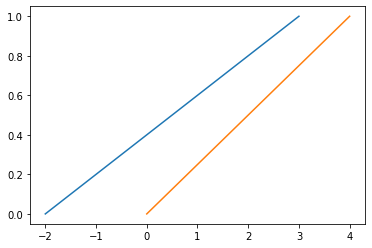

In [ ]:

#funciones de activación junto con sus derivadas
#funcion sigmoide
sig=(lambda x: 1 / (1 + np.e**(-x)),
      lambda x: x*(1-x))
#Para la derivada de relu
#se requiere definir una funcion en donde se cree la matriz de salida
def  derivarrelu(x):
  #se optiene el tamaño del vector x
  fila=len(x)
  columna=len(x[0])

  derf=[]#array de salida
  for i in range(fila):
    derc=[]#array de cada fila
    for j in range(columna):
      z=x[i][j]
      if z>0:
        derc.append(1)
      else:
        
        derc.append(0)
    derf.append(derc)
  return derf
#funcion relu
relu=(lambda x: np.maximum(0,x),
      lambda x: derivarrelu(x))

#funcion tangente hiperbolica
tanh=(lambda x: (np.tanh(x)),
      lambda x: (1/(np.cosh(x)**2)))
#Para elejir la funcion
def func_acti(fun):
  if fun==1:
    fun_ac=sig
  elif fun==2:
    fun_ac=relu
  elif fun==3:
    fun_ac=tanh
  return fun_ac

#verificar que las funciones estan bien definidas
#_x=np.linspace(-5,5,30)
_x=[[3, 4],[-2,0],[-2,0]]

print(len(_x))
print(len(_x[0]))

plt.plot(_x,relu[1](_x))

In [ ]:
#crear la red neuronal, con solo una capa oculta

def crear_red(topologia, fun_ac):
  nn=[]#contiene las capas de la red neuronal
  for c, capa in enumerate(topologia[:-1]):#crear las conecciones entre las capas
    nn.append(red_neuronal(topologia[c],topologia[c+1],fun_ac))
    #nn.append(red_neuronal)
  return nn
topologia=[2,4,8,16,8,4,1]
print(topologia)
crear_red(topologia, sig)

[2, 4, 8, 16, 8, 4, 1]


In [ ]:
entrada=4
oculta=4
salida=1
fun=1
fun_ac=func_acti(fun)
#entrenamiento

#se define la funcion de perdida L2
per_L2= (lambda Yp, Yr: np.mean((Yp-Yr)**2),
         lambda Yp, Yr: 2*(Yp-Yr))
#se crea la red 
topologia=[entrada, oculta, salida]
red=crear_red(topologia, fun_ac)
#se eligen los datos para entrenar y verificar

In [ ]:



# la variable entreno si es true es para entreanar y si es false es para 
#ver la validacion en donde no se entrena
def entreno(red, d_entrada, d_salida, per_L2, t_aprendizaje, m_aprendizaje, entreno):
  
  #primero se predice el valor que generan los pesos actuales

  #guardar el valor de la suma de productos y la funcion evaluada
  sal_capas=[(None,d_entrada)];#se crea con el valor del primer caso
  for l, layer in enumerate(red):
    #suma de productos
    s_p=sal_capas[-1][1]@red[l].w
    #se evalua la funcion
    a=red[l].act_f[0](s_p)
    sal_capas.append((s_p,a))
    #calculo de perdida, se calcula cuando se evalua la funcion en la capa oculta
    if l==1:
      perdida=per_L2[0](a,d_salida)
      #print('a',a)
      #print('s',d_salida)
      #print('p',perdida)

    #para la retropropagacion
  if entreno:
    deltas=[]
    for l in reversed(range(0, len(red))):
       #tamaño de la salida 
       zl=sal_capas[l+1][0]
       al=sal_capas[l+1][1]

       if l==len(red)-1: #caso dela ultima capa
         #print(al)
         deltas.insert(0,per_L2[1](al,d_salida)*red[l].act_f[1](al))
         
       else:
         #print(deltas)
         #print(deltas[0].shape)
         #print(_W.T.shape)
         deltas.insert(0,deltas[0] @_W.T*red[l].act_f[1](al))
       _W=red[l].w
      #descenso de gradiente
      #para el caso de requerir una tasa variable
       if m_aprendizaje==2:
        #se cnsiderara una desviacion estandar del 7,5% el valor del promedio
        #al cual se le aplica el 25% de aleatoriedad
        des= t_aprendizaje*0.075*0.25
        ruido_gaus=np.random.normal(t_aprendizaje,des,1)
        t_aprendizaje=ruido_gaus[0]
       red[l].w=red[l].w-sal_capas[l][1].T@deltas[0]*t_aprendizaje
       
  return sal_capas[-1][1]



[[0.895]
 [0.888]
 [0.893]
 ...
 [0.756]
 [0.753]
 [0.739]]


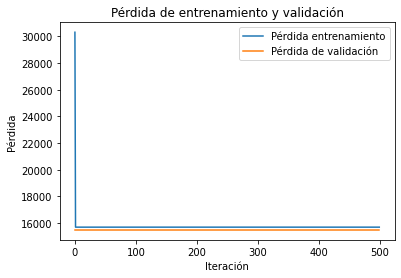

15693.765494360267 15486.50117635255


In [ ]:
entrada=5
oculta=3
salida=1
fun=2
fun_ac=func_acti(fun)
#entrenamiento

#se define la funcion de perdida L2
per_L2= (lambda Yp, Yr: np.mean((Yp-Yr)**2),
         lambda Yp, Yr: 2*(Yp-Yr))
#se crea la red 
topologia=[entrada, oculta, salida]
red=crear_red(topologia, fun_ac)





N=d_1e.shape[0]
#SEPARAR ENTRENAMIENTO DE VERIFICACION
v_entrada, v_salida,v_entrada_v, v_salida_v=datosselec(N, d_1e,d_1s)
print(v_salida)

p_entr=[]
p_val=[]
for i in range (500):
  s_e=entreno(red, v_entrada, v_salida, per_L2, 0.1, 1, True)
  perdida1=per_L2[0](s_e*max11[0], v_salida*max11[0])
  p_entr.append(perdida1)
  s_v=entreno(red, v_entrada_v, v_salida_v, per_L2, 0.1, 1, False)
  perdida2=per_L2[0](s_v*max11[0], v_salida_v*max11[0])
  p_val.append(perdida2)

#imprimir grafico de perdidas
plt.plot(p_entr, label="Pérdida entrenamiento")
plt.plot(p_val, label="Pérdida de validación")
plt.title('Pérdida de entrenamiento y validación')
plt.xlabel('Iteración')
plt.ylabel('Pérdida')
plt.legend()
plt.show()
print(p_entr[499],p_val[499])

## Grafica De perdida

[0.02086379667294891, 5.226493840736635, 1.907882906817676, 2.229371470516953, -1.4287660974708083, 17.140778195463465, 17.142151573130487, 12.578865120976298, 8.015578669129752, 3.4522922395563205, -1.1109938207080416]


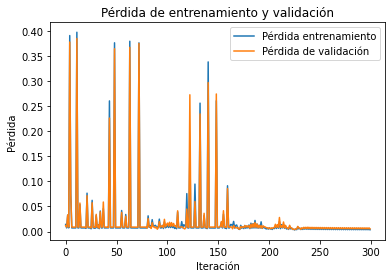

In [ ]:
#se grafica la perdida
perdida_verificacion,perdida_entrenamiento=entrenemiento(d_1e,d_1s, 5, 1, 7, 1, 0.1, 1)
plt.plot(perdida_entrenamiento, label="Pérdida entrenamiento")
plt.plot(perdida_verificacion, label="Pérdida de validación")
plt.title('Pérdida de entrenamiento y validación')
plt.xlabel('Iteración')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


## Grafica del Peso


No handles with labels found to put in legend.


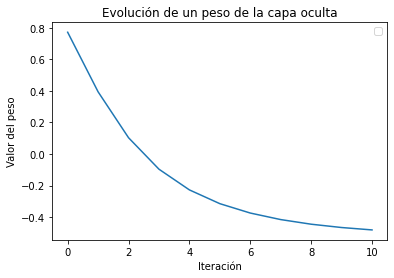

In [ ]:
g_peso=entrenemiento(d_2e,d_2s, 4, 1, 3, 1, 0.1, 1)
plt.plot(g_peso)
plt.title('Evolución de un peso de la capa oculta')
plt.xlabel('Iteración')
plt.ylabel('Valor del peso')
plt.legend()
plt.show()